In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from run_evolution import folder_evol
from analytical_results import fT00, fT01, fT11, fj0, fj1, fnu, fLn
from ploting import plot_heatmaps

In [9]:
g = 1
v, Q = 1, 1
tol, method = 1e-6, '12site'
#
ms = [0, 0.1, 0.2, 0.318309886, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
mg = [g * x for x in ms]
NaDdt =  [(1024, 1/16, 256, 1/16), (1024, 1/16, 512, 1/16), (1024, 1/16, 1024, 1/16)]

data = {}

for m in ms:
    for N, a, D, dt in NaDdt:
        D0 = D
        try:
            folder = folder_evol(g, m, a, N, v, Q, D0, dt, D, tol, method, mkdir=False)
            data[m, N, a, dt] = np.load(folder / f"results.npy", allow_pickle=True).item()
        except FileNotFoundError:
            pass

In [21]:
g = 1
v, Q = 1, 1
tol, method = 1e-6, '12site'
D0, D = 256, 256
#
ms = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
mg = [g * x for x in ms]
NaDdt =  [(512, 0.125, 128, 1/16)]  # (512, 0.0625, 256, 1/16),


for m in ms:
    for N, a, D, dt in NaDdt:
        D0 = D
        try:
            folder = folder_evol(g, m, a, N, v, Q, D0, dt, D, tol, method, mkdir=False)
            data[m, N, a, dt] = np.load(folder / f"results.npy", allow_pickle=True).item()
        except FileNotFoundError:
            pass

In [10]:
data.keys()

dict_keys([(0, 1024, 0.0625, 0.0625), (0.1, 1024, 0.0625, 0.0625), (0.2, 1024, 0.0625, 0.0625), (0.318309886, 1024, 0.0625, 0.0625), (0.4, 1024, 0.0625, 0.0625), (0.5, 1024, 0.0625, 0.0625), (0.6, 1024, 0.0625, 0.0625), (0.7, 1024, 0.0625, 0.0625), (0.8, 1024, 0.0625, 0.0625), (0.9, 1024, 0.0625, 0.0625), (1.0, 1024, 0.0625, 0.0625)])

In [12]:
ms = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.318309886, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [11]:
NUM_COLORS = 21
cm = plt.get_cmap('gist_rainbow')
colors = [cm(i / NUM_COLORS) for i in range(NUM_COLORS)]
lines = ['-', '--', ':']

/tmp/ipykernel_57310/80387698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(ncols=1, bbox_to_anchor=(1, 1))


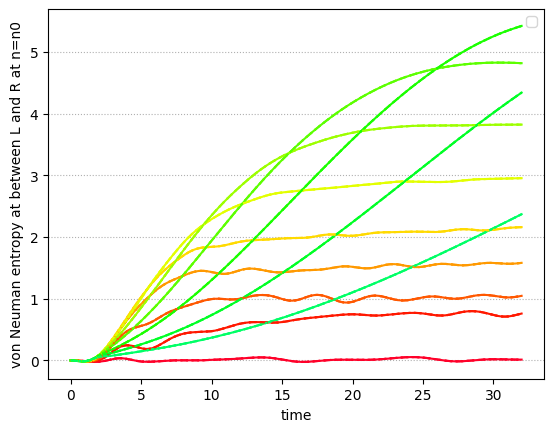

In [ ]:
for j, (N, a, D, dt) in enumerate(NaDdt):
    for i, m in enumerate(ms):
        try:
            tm = data[m, N, a, dt]["time"]
            mask = tm > -1
            tm = tm[mask]

            ee = data[m, N, a, dt]["entropy_1"][mask]
            ee = ee - ee[0]

            line, = plt.plot(tm, ee[:, N // 2] , lines[j], color=colors[i])
            line.set_label(f"{a=:0.2f} {m/g=:0.2f}")
        except:
            pass

plt.grid(axis="y", linestyle=':')

plt.xlabel('time')
plt.ylabel('von Neuman entropy at between L and R at n=n0')
plt.legend(ncols=1, bbox_to_anchor=(1, 1))

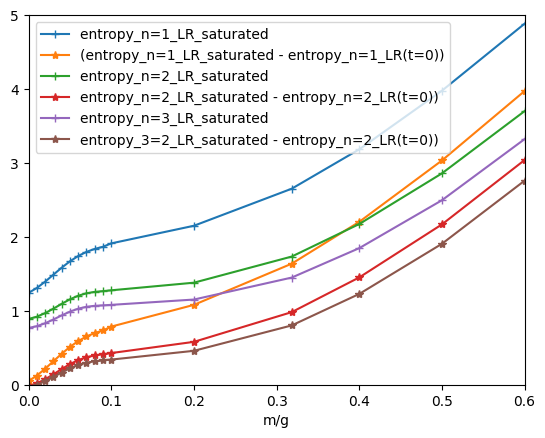

In [ ]:
entropy_ms = []
entropy_e0_ms = []

entropy2_ms = []
entropy2_e0_ms = []

entropy3_ms = []
entropy3_e0_ms = []

for j, (N, a, D, dt) in enumerate(NaDdt):
    for i, m in enumerate(ms):
        tm = data[m, N, a, dt]["time"]
        mask = tm > -1
        tm = tm[mask]
        ee = data[m, N, a, dt]["entropy_1"][mask][:, N // 2]
        eee = np.mean(ee[-64:])

        entropy_ms.append(eee)
        entropy_e0_ms.append(eee - ee[0])


        ee = data[m, N, a, dt]["entropy_2"][mask][:, N // 2]
        eee = np.mean(ee[-64:])

        entropy2_ms.append(eee)
        entropy2_e0_ms.append(eee - ee[0])


        ee = data[m, N, a, dt]["entropy_3"][mask][:, N // 2]
        eee = np.mean(ee[-64:])

        entropy3_ms.append(eee)
        entropy3_e0_ms.append(eee - ee[0])

plt.plot(ms, entropy_ms, '-+', label='entropy_n=1_LR_saturated ')
plt.plot(ms, entropy_e0_ms, '-*', label='(entropy_n=1_LR_saturated - entropy_n=1_LR(t=0))')

plt.plot(ms, entropy2_ms, '-+', label='entropy_n=2_LR_saturated ')
plt.plot(ms, entropy2_e0_ms, '-*', label='entropy_n=2_LR_saturated - entropy_n=2_LR(t=0))')

plt.plot(ms, entropy3_ms, '-+', label='entropy_n=3_LR_saturated ')
plt.plot(ms, entropy3_e0_ms, '-*', label='entropy_3=2_LR_saturated - entropy_n=2_LR(t=0))')

plt.xlim([0, 0.6])
plt.ylim([0, 5])
plt.xlabel('m/g')
plt.legend()

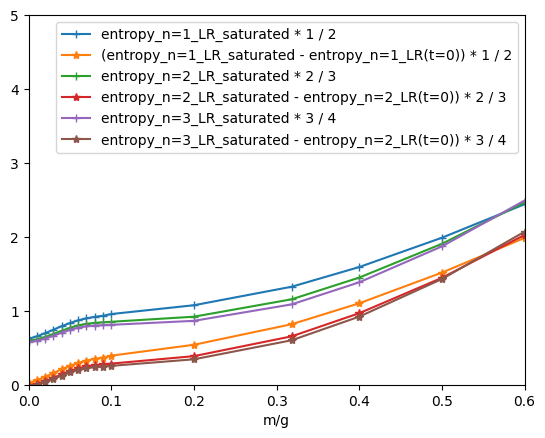

In [33]:
entropy_ms = []
entropy_e0_ms = []

entropy2_ms = []
entropy2_e0_ms = []

entropy3_ms = []
entropy3_e0_ms = []

for j, (N, a, D, dt) in enumerate(NaDdt):
    for i, m in enumerate(ms):
        tm = data[m, N, a, dt]["time"]
        mask = tm > -1
        tm = tm[mask]
        ee = data[m, N, a, dt]["entropy_1"][mask][:, N // 2] * 1 / 2
        eee = np.mean(ee[-64:])

        entropy_ms.append(eee)
        entropy_e0_ms.append(eee - ee[0])


        ee = data[m, N, a, dt]["entropy_2"][mask][:, N // 2]  * 2 / 3
        eee = np.mean(ee[-64:])

        entropy2_ms.append(eee)
        entropy2_e0_ms.append(eee - ee[0])


        ee = data[m, N, a, dt]["entropy_3"][mask][:, N // 2]  * 3 / 4
        eee = np.mean(ee[-64:])

        entropy3_ms.append(eee)
        entropy3_e0_ms.append(eee - ee[0])


plt.plot(ms, entropy_ms, '-+', label='entropy_n=1_LR_saturated * 1 / 2')
plt.plot(ms, entropy_e0_ms, '-*', label='(entropy_n=1_LR_saturated - entropy_n=1_LR(t=0)) * 1 / 2')

plt.plot(ms, entropy2_ms, '-+', label='entropy_n=2_LR_saturated * 2 / 3')
plt.plot(ms, entropy2_e0_ms, '-*', label='entropy_n=2_LR_saturated - entropy_n=2_LR(t=0)) * 2 / 3')

plt.plot(ms, entropy3_ms, '-+', label='entropy_n=3_LR_saturated * 3 / 4')
plt.plot(ms, entropy3_e0_ms, '-*', label='entropy_n=3_LR_saturated - entropy_n=2_LR(t=0)) * 3 / 4')

plt.xlim([0, 0.6])
plt.ylim([0, 5])
plt.xlabel('m/g')
plt.legend()